#  Bipartite graph signal processing

## Generate Bipartite graph

In [1]:
import numpy as np
import networkx as nx
from scipy.sparse.linalg import eigsh
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
import os
from time import gmtime, strftime
import scipy as sp
import cvxpy as cvx
from sklearn.linear_model import lars_path
%matplotlib inline 
import sys
sys.path.append('/home/tianpei/Dropbox/Codes/Python/LatNet/src/')

In [2]:
from latent_signal_network import latent_signal_network as lsn 

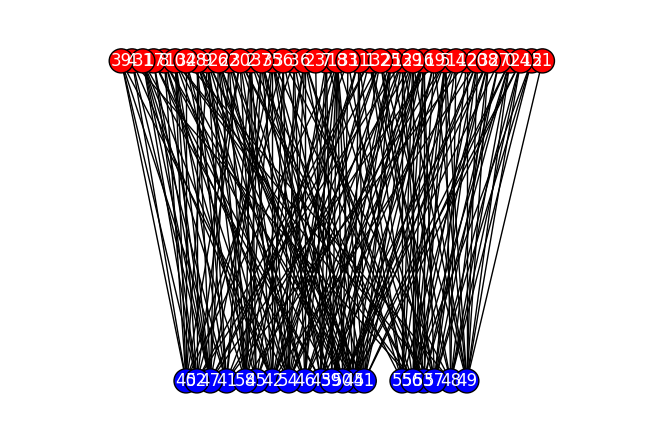

In [3]:
savefigure = False
seed = 1000
choice = 'bipartite_binomial'
d = 12
if choice == 'newman':
    size = 20
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'model': choice}
    option['k-NN'] = 2
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
elif choice == 'partition':
    size = [20, 20]
    prob = [0.8, 0.1]
    option= {'seed': seed, 'node_dim': d, 'model': choice}
    option['cutoff_freq'] = 12
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
elif choice == 'grid':
    size = [5, 5]
    prob = 0.6
    option= {'seed': seed, 'node_dim': d, 'model': choice}
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option)
elif choice == 'binomial':
    size = 20
    prob = 0.18

    option= {'seed': seed, 'node_dim': d, 'model': choice}
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option)
    
elif choice == 'tree':
    size = 20
    gamma = 3
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'gamma': gamma ,'model': choice}
    option['cutoff_freq'] = 10
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
    
elif choice == 'balanced_tree':
    size = 20
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'model': choice}
    option['r'] = 2
    option['h'] = 3
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)  
    
elif choice == 'bipartite_binomial':
    size = [40, 20]
    prob = 0.3
    option= {'seed': seed, 'node_dim': d, 'model': choice}
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)  
    
elif choice == 'bipartite_uniform':
    size = [40, 20]
    prob = 0.17
    num_edges = prob*size[0]*size[1]
    option= {'seed': seed, 'node_dim': d, 'model': choice}
    option['num_edges'] = num_edges
    LSN = lsn(size, prob, option)
    G0 = LSN.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)     

Plot the eigenvalue of Laplacian matrix

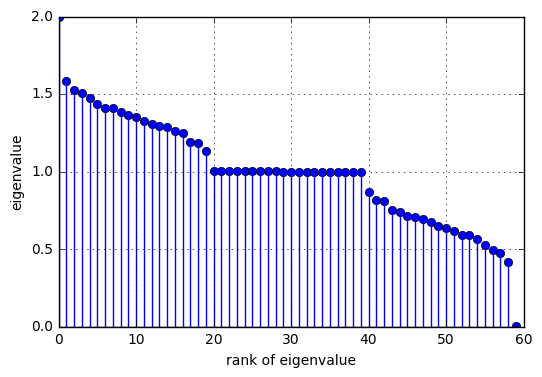

In [4]:
#Plot the eigenvalue of Laplacian matrix
Laplacian = nx.normalized_laplacian_matrix(G0).todense()
#Sigma, U = np.linalg.eigh(abs(adjMat))
Sigma, U = np.linalg.eigh(Laplacian)

index_sig = np.argsort(Sigma)
Sigma = Sigma[index_sig[::-1]]
U = U[:,index_sig[::-1]]

fig3 =plt.figure(3)
ax = plt.gca()
(markerline, stemlines, baseline) = plt.stem(np.arange(len(Sigma)), Sigma, 'b', basefmt='k-')
#plt.plot(np.arange(len(Sigma)), np.ones((len(Sigma, ))), 'r')
plt.xlabel('rank of eigenvalue')
plt.ylabel('eigenvalue')
ax.grid(True)
plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_eigenvalue_laplacian.eps"
#filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_eigenvalue_adjMat.eps"
if savefigure : fig3.savefig(filename)

Degree ranking

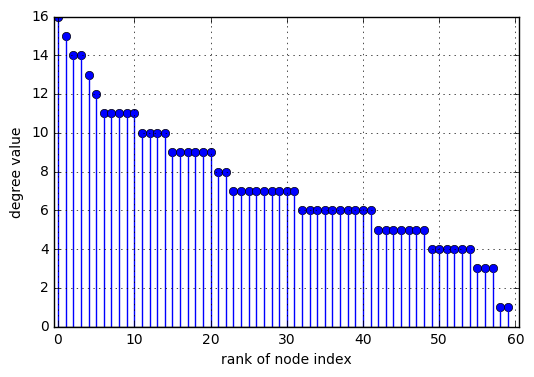

In [5]:
degrees = G0.degree()
degree_val = np.array(list(degrees.values()))
degree_node = np.array(list(degrees.keys()))
deg_idx = list(np.argsort(degree_val))

degree_val = degree_val[deg_idx[::-1]]
degree_node = degree_node[deg_idx[::-1]]

fig5 =plt.figure(5)
ax = plt.gca()
(markerline, stemlines, baseline) = plt.stem(np.arange(len(degree_node)), degree_val, 'b', basefmt='k-')
#plt.plot(np.arange(len(Sigma)), np.ones((len(Sigma, ))), 'r')
plt.xlim(-0.5, len(degree_val)+0.5)
plt.xlabel('rank of node index')
plt.ylabel('degree value')
ax.grid(True)
plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_degree_dist.eps"
if savefigure : fig5.savefig(filename)

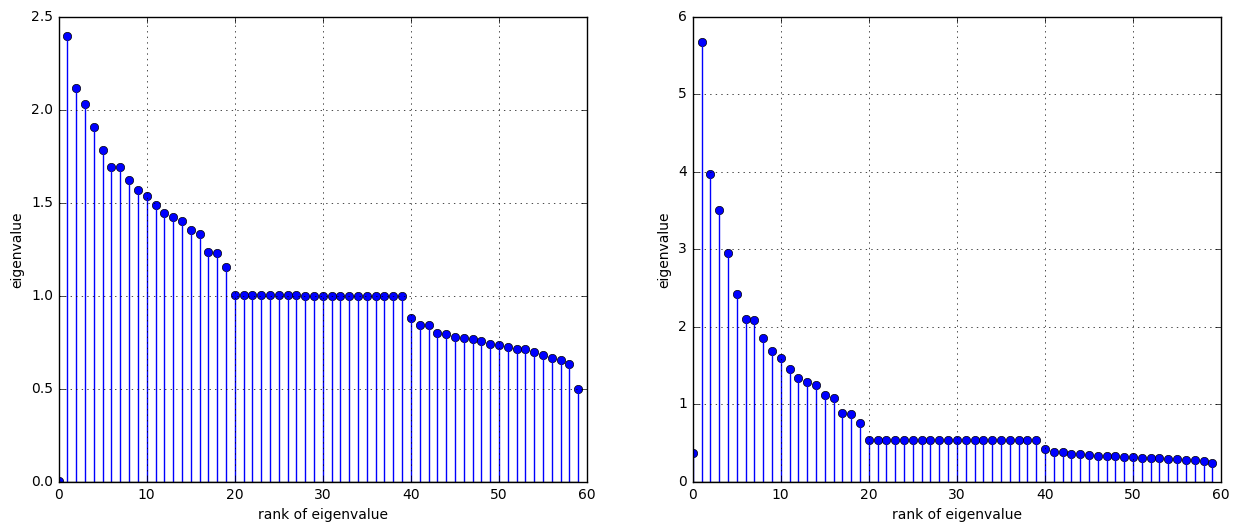

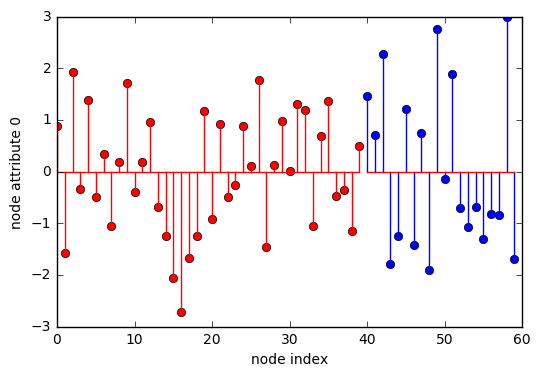

In [6]:
Tmax = 1
option_sig = {}
option_sig['mat'] = 'laplacian_matrix' #'adjacency_matrix'
choice2 = 'polynomial'

if choice2 == 'l1_threshold':
    option_sig['method'] = choice2
    option_sig['threshold'] = 0.5
elif choice2 == 'polynomial':
    option_sig['method'] = choice2
    degree_val = np.array(list(G0.degree().values()))
    bias = 1/np.sqrt(np.mean(degree_val))
    option_sig['coeffs'] = [bias, -1/2, 1/3, 1/3]
elif choice2 == 'rescale':
    option_sig['method'] = choice2
    option_sig['weights'] = np.random.rand((len(G0),))
elif choice2 == 'sigmoid_theshold':
    option_sig['method'] = choice2
    option_sig['rate'] = 1
    option_sig['shift'] = 0.5
    option_sig['bias'] = 0
    
     
    
G0_node, X0, _= LSN.smooth_gsignal_filter(G0, option_sig, sigma=10, seed=10, add_noise=False, show_plot=True, save_fig=savefigure)
#G0_node, X0, hist_tv = LSN.smooth_gsignal_generate(G0, T=Tmax, sigma=10, alpha=0.2, seed=10, add_noise=False, overwrite=True)
fig1 = plt.figure(1)
if 'bipartite' in choice:
    node_sets = bipartite.sets(G0)
    (markerline, stemlines, baseline) = plt.stem(np.arange(len(node_sets[0])),X0[0:len(node_sets[0]),0], 'r')
    plt.setp(markerline, 'markerfacecolor', 'r')
    (markerline, stemlines, baseline) = plt.stem(len(node_sets[0])+np.arange(len(node_sets[1])),X0[len(node_sets[0]):len(G0),0], 'b')
    plt.setp(markerline, 'markerfacecolor', 'b')
else:    
    (markerline, stemlines, baseline) = plt.stem(np.arange(X0.shape[0]),X0[:,0])
plt.xlabel('node index')
plt.ylabel('node attribute 0')
plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_node_fea0.eps"
if savefigure : fig1.savefig(filename)

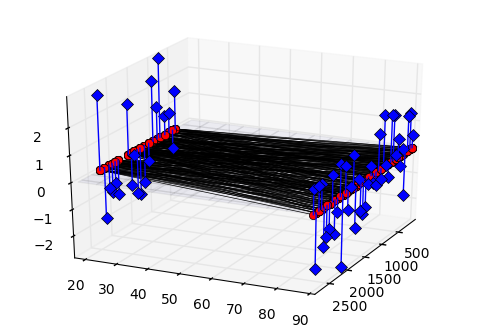

In [7]:
if choice == 'newman' or choice == 'tree':
    pos=nx.circular_layout(G0, dim=2, scale=1.0, center=None)
elif choice == 'grid':
    pos=dict(zip(G0.nodes(), [np.asarray(u) for u in G0.nodes()]))
elif 'bipartite' in choice:
    pos=nx.nx_pydot.graphviz_layout(G0, prog='dot')
else:
    pos=nx.nx_pydot.graphviz_layout(G0)
    
X0_2, nodeIdx = LSN.get_node_attributes(G0_node)
pos_coordinate = np.array([[pos[it['node']][0], pos[it['node']][1]] for it in nodeIdx])

edge_list = LSN.get_edgelist(G0_node)

view_angle = [25, 25] #[25, 180]
LSN.plot_node_3d(pos_coordinate, edge_list, X0_2, view_angle=view_angle, nodeIdx=nodeIdx, save_fig=savefigure)

## Marginal covariance and precision of the observerd data
The covariance and adjacency matrix. First preprocessing, make data centered with unit variance for each row. 

In [8]:
from sklearn import preprocessing
#X0 += np.random.randn(X0.shape[0], X0.shape[1])
X0 -= np.mean(X0, axis=0)
X0 /= X0.std(axis=0)

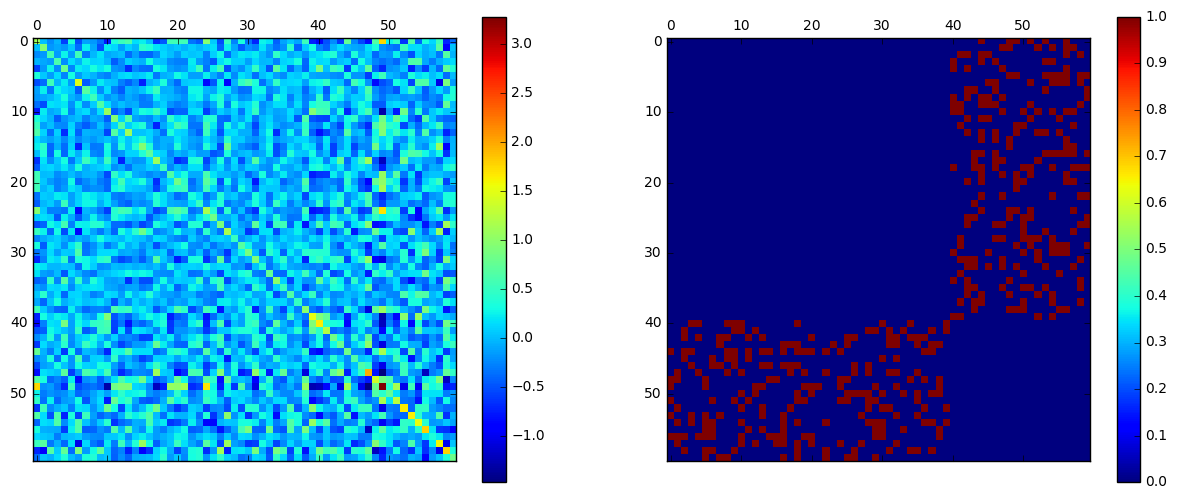

In [9]:
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
covariance_all = np.cov(X0)
cax = ax.matshow(covariance_all)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
adjMat =  nx.adjacency_matrix(G0).todense()
cax = ax.matshow(adjMat)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_cov_adjmat.eps"
if savefigure : fig2.savefig(filename)

See that even no edges between nodes in each cluster, there exists correlation between their measurements. We can then extract out one cluster and hide the other. 

In [10]:
node_sets = bipartite.sets(G0)
node_lists = [list(node_sets[0]), list(node_sets[1])]
observed_idx = [item['loc'] for item in nodeIdx if item['node'] in node_sets[0]]
hidden_idx = [item['loc'] for item in nodeIdx if item['node'] in node_sets[1]]

Covariance_11 = covariance_all[np.ix_(node_lists[0], node_lists[0])]

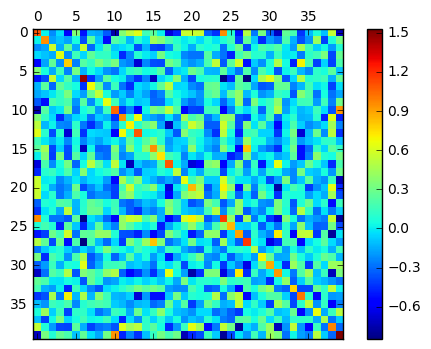

In [11]:
fig2= plt.figure(2)
ax = fig2.add_subplot(111)
covariance_all = np.cov(X0)
cax = ax.matshow(Covariance_11)
fig2.colorbar(cax)

#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_cov_adjmat.eps"
if savefigure : fig2.savefig(filename)

The existing data should be conditional independent. 

In [12]:
from graphical_lasso import sparse_inv_cov_glasso 

In [13]:
alpha = 0.6
covariance, precision = sparse_inv_cov_glasso(X0[observed_idx,:], alpha=alpha, max_iter = 100)

The precision matrix and the Laplacian matrix of observed data part

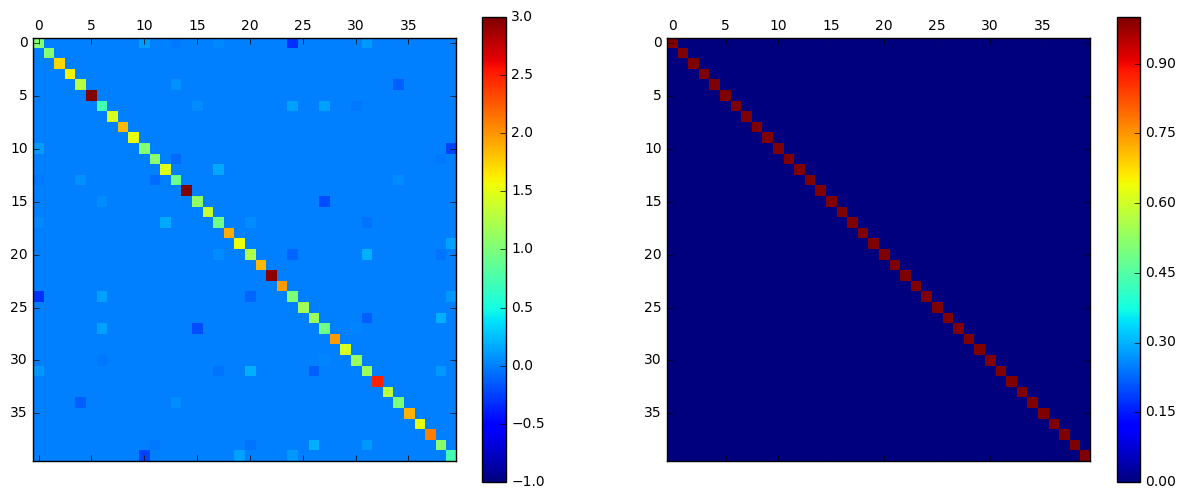

In [14]:
# plot the precision matrix and the support of Laplacian matrix
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(precision, vmin=-1, vmax=3)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)



cax = ax.matshow(Laplacian[np.ix_(node_lists[0], node_lists[0])])
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)

The precision matrix if the entire data is observed. 

In [15]:
covariance_est_all, precision_all = sparse_inv_cov_glasso(X0, alpha=alpha, max_iter = 100)

The algorithm did not coverge. Try increasing the max number of iterations.


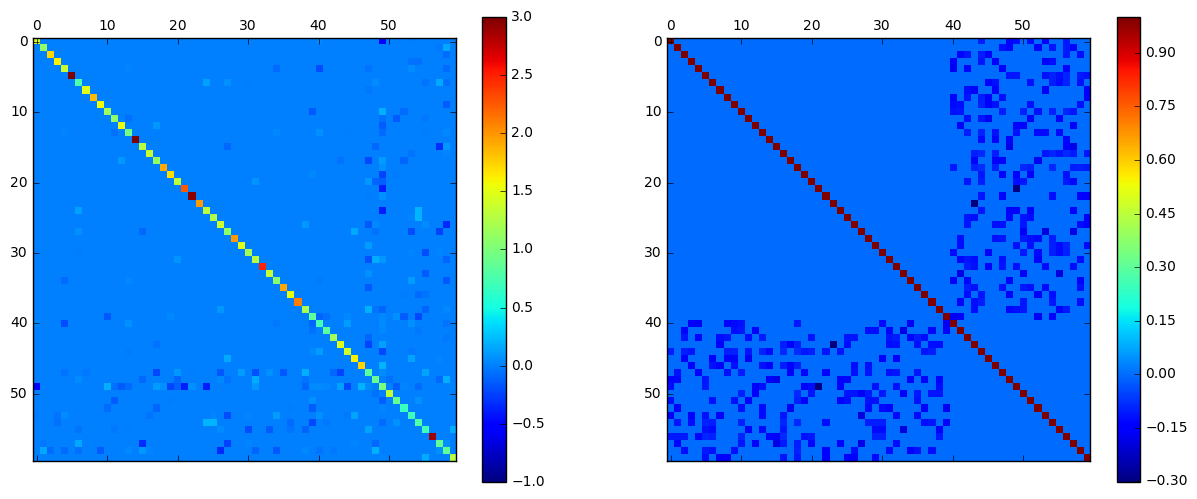

In [16]:
# plot the precision matrix and the support of Laplacian matrix
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(precision_all, vmin=-1, vmax=3)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)


cax = ax.matshow(Laplacian)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)

In [17]:
from latent_graphical_lasso import latent_variable_glasso_random, latent_variable_glasso_data

Adding independent random noise to hidden variables

In [18]:
covariance_o, precision_o, _, prec_all_list = latent_variable_glasso_random(X0[observed_idx,:], h_dim=len(node_sets[1]), alpha=alpha, max_iter_out = 8, max_iter_in=100, return_hists=True)

NameError: name 'lasso_path' is not defined

estimated precision for latent GGMs and GGMs on observed data

In [ ]:
# plot the precision matrix and the support of Laplacian matrix
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(precision_o, vmin=-1, vmax=3)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(precision, vmin=-1, vmax=3)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
# the support of learned inverse covariance matrix and the support of adjacency matrix 
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(prec_all_list[-1])), vmin=0, vmax =1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(Laplacian)), vmin=0, vmax =1)
fig2.colorbar(cax)


plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_bin.eps"
if savefigure : fig2.savefig(filename)

See that effec of the hidden variables are deleted.

In [ ]:
# the support of learned inverse covariance matrix and the support of adjacency matrix 
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(prec_all_list[0])), vmin=0, vmax =1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(Laplacian)), vmin=0, vmax =1)
fig2.colorbar(cax)


plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_bin.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
# the support of learned inverse covariance matrix and the support of adjacency matrix 
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(prec_all_list[1])), vmin=0, vmax =1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(Laplacian)), vmin=0, vmax =1)
fig2.colorbar(cax)


plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_bin.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
# the support of learned inverse covariance matrix and the support of adjacency matrix 
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(prec_all_list[2])), vmin=0, vmax =1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(Laplacian)), vmin=0, vmax =1)
fig2.colorbar(cax)


plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_bin.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
# the support of learned inverse covariance matrix and the support of adjacency matrix 
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(prec_all_list[3])), vmin=0, vmax =1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(Laplacian)), vmin=0, vmax =1)
fig2.colorbar(cax)


plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_bin.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
# plot the precision matrix and the support of Laplacian matrix
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(precision_o, vmin=-1, vmax=3)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(precision_all[np.ix_(observed_idx, observed_idx)],vmin=-1, vmax=3)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
covariance_o_h, precision_o_h, _, prec_all_list_h = latent_variable_glasso_data(X0[observed_idx,:], X0[hidden_idx,:], alpha=alpha, max_iter_out = 8, max_iter_in=100, return_hists=True)

In [ ]:
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(precision_o, vmin=-1, vmax=3)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(precision_o_h,vmin=-1, vmax=3)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(precision_o)), vmin=0, vmax=1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(precision_o_h)),vmin=0, vmax=1)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)

In [ ]:
fig2= plt.figure(2, figsize=(15,6))
ax = fig2.add_subplot(121)
cax = ax.matshow(sp.sign(abs(precision_all[np.ix_(observed_idx,observed_idx)])), vmin=0, vmax=1)
fig2.colorbar(cax)

ax = fig2.add_subplot(122)
cax = ax.matshow(sp.sign(abs(precision_o_h)),vmin=0, vmax=1)
fig2.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.show()
filename = "../figures/"+strftime("%d%m%Y_%H%M%S", gmtime()) + "_precision_laplacian.eps"
if savefigure : fig2.savefig(filename)
